# **Exploratory Data Analysis On IMDB Movie Data**

Dataset From https://www.kaggle.com/datasets/PromptCloudHQ/imdb-data

# **About this file**

Here's a data set of 1,000 most popular movies on IMDB in the last 10 years. The data fields included are:

Title, Genre, Description, Director, Actors, Year, Runtime, Rating, Votes, Revenue, Metascrore.

# **Tasks**



*   Ask Questions
*   Wrangleb Data

*   Perform Exploratory Data Analysis
*   Draw Conclusions and Communicate Your Results





# Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read Dataset

In [7]:
data=pd.read_csv('/content/IMDB-Movie-Data.csv')

# **Display The DataFrame**

In [ ]:
df = pd.DataFrame(data)
print(df)

# **Display Top 10 Rows of The Dataset**

In [ ]:
data.head(10)

# Check Last 10 Rows of The Dataset

In [ ]:
data.tail(10)

# Find Shape of Our Dataset(Number of Columns and Rows)

In [ ]:
data.shape

In [ ]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

# Getting Information About Our Dataset Like Total Number of Rows,Total Number of Columns,Datatypes of Each Column and Memory Requirment

In [ ]:
data.info()

# Check Missing Values in The Dataset

In [ ]:
print("Any Missing Value?",data.isnull().values.any())

In [ ]:
data.isnull().sum()

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
per_missing = data.isnull().sum() * 100 / len(data)
per_missing

# Drop All The Missing Values


In [ ]:
data.dropna(axis=0)

# Check For Duplicate Data

In [ ]:
dup_data=data.duplicated().any()

In [ ]:
print("Are there any duplicate values?",dup_data)

# Get Overall Statistics About The Dataframe

In [ ]:
data.describe()

In [ ]:
data.describe(include='all')


## **Questions**
# 1.Display Title of The Movie Having Runtime Greater Than or Equal to 180 Minutes

In [ ]:
data.columns

In [9]:
data[data[ 'Runtime (Minutes)']>=180] ['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
828                 Grindhouse
965              Inland Empire
Name: Title, dtype: object

# 2.In Which Year There Was The Highest Average Voting?

In [ ]:
data.columns

In [ ]:
data.groupby('Year')['Votes'].mean().sort_values(ascending=False)

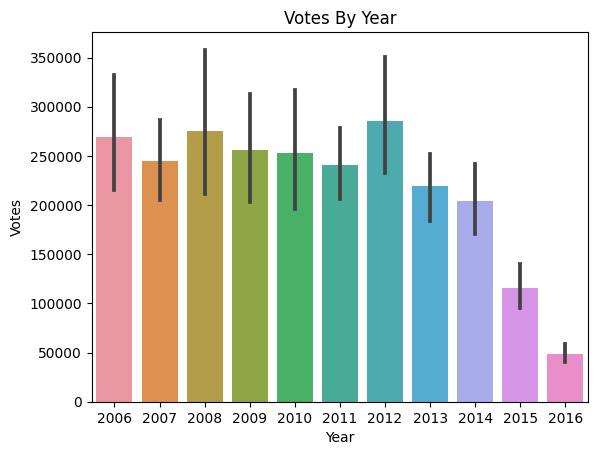

In [10]:
sns.barplot(x='Year',y='Votes',data=data)
plt.title("Votes By Year")
plt.show()

# 3.In Which Year There Was The Highest Average Revenue?

In [ ]:
data.columns

In [ ]:
data.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending=False)

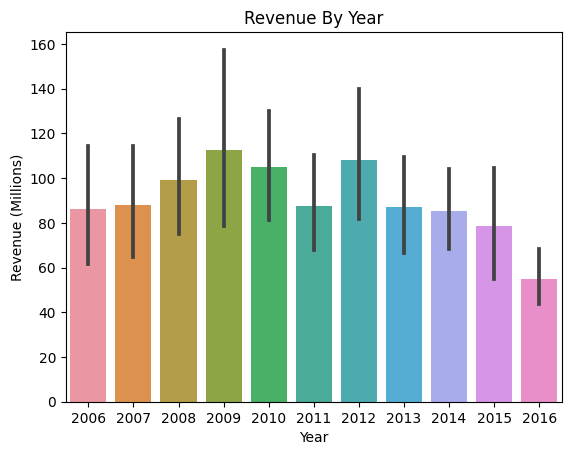

In [11]:
sns.barplot(x='Year',y='Revenue (Millions)',data=data)
plt.title("Revenue By Year")
plt.show()

# 4.Find The Average Rating For Each Director

In [ ]:
data.columns

In [12]:
data.groupby('Director')['Rating'].mean().sort_values(ascending=False)

Director
Nitesh Tiwari        8.80
Christopher Nolan    8.68
Olivier Nakache      8.60
Makoto Shinkai       8.60
Aamir Khan           8.50
                     ... 
Micheal Bafaro       3.50
Jonathan Holbrook    3.20
Shawn Burkett        2.70
James Wong           2.70
Jason Friedberg      1.90
Name: Rating, Length: 644, dtype: float64

# 5.Display Top 10 Lengthy Movies Title and Runtime

In [ ]:
data.columns

In [14]:
top10_len=data.nlargest(10,'Runtime (Minutes)')[['Title', 'Runtime (Minutes)']]\
.set_index('Title')

In [ ]:
top10_len

<Axes: xlabel='Runtime (Minutes)', ylabel='Title'>

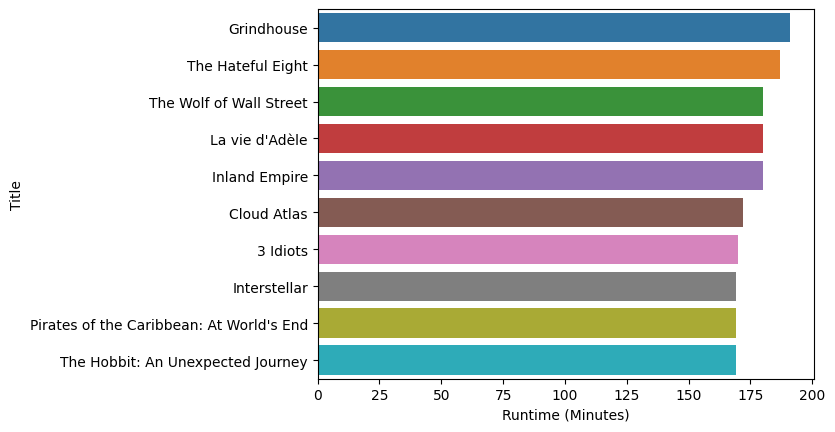

In [16]:
sns.barplot(x='Runtime (Minutes)',y=top10_len.index,data=top10_len)

# 6.Display Number of Movies Per Year

In [ ]:
data.columns

In [ ]:
data['Year'].value_counts()

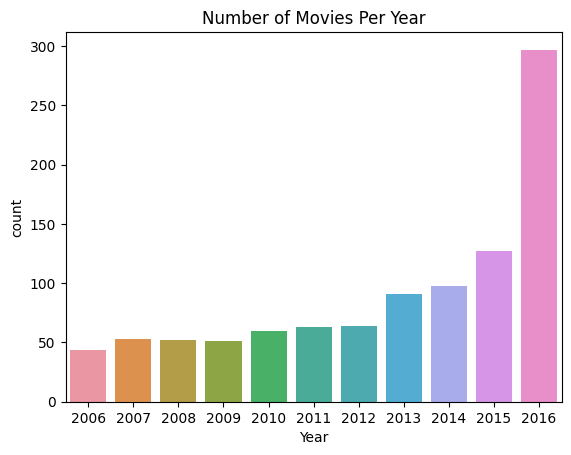

In [18]:
sns.countplot(x='Year',data=data)
plt.title("Number of Movies Per Year")
plt.show()

# 7.Find Most Popular Movie Title (Highest Revenue)

In [ ]:
data.columns

In [19]:
data[data['Revenue (Millions)'].max()==data['Revenue (Millions)']]['Title']

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

# 8.Display Top 10 Highest Rated Movie Titles and its Directors

In [ ]:
data.columns

In [21]:
top10_len=data.nlargest(10,'Rating')[['Title', 'Rating', 'Director']]\
.set_index('Title')

In [ ]:
top10_len

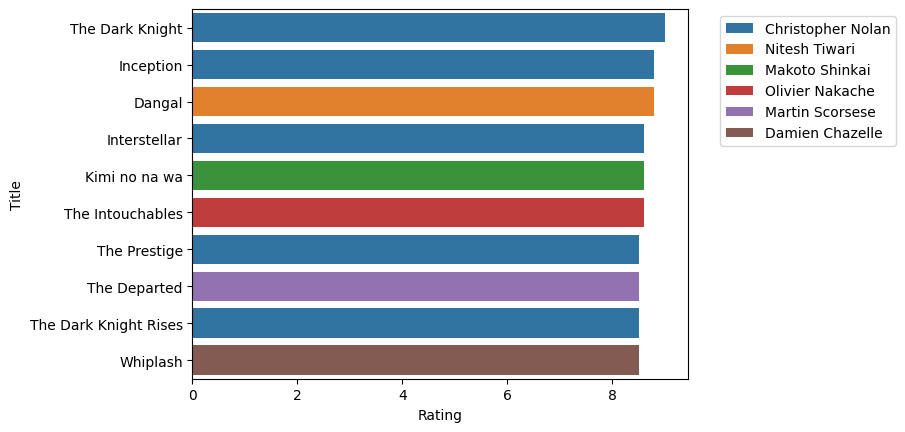

In [22]:
sns.barplot(x='Rating',y=top10_len.index,data=top10_len,hue='Director',dodge=False)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

# 9.Display Top 10 Highest Revenue Movie Titles

In [ ]:
data.columns

In [ ]:
data.nlargest(10,'Revenue (Millions)')['Title']

In [24]:
top_10=data.nlargest(10,'Revenue (Millions)')[['Title','Revenue (Millions)']].\
set_index('Title')

In [ ]:
top_10

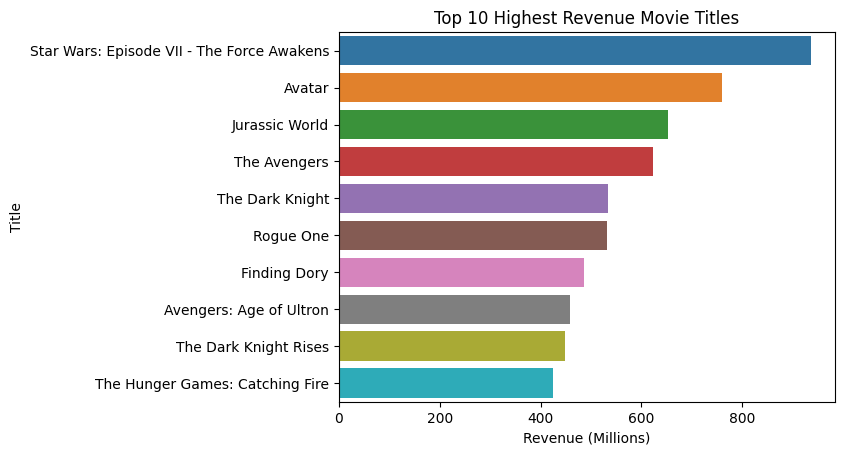

In [25]:
sns.barplot(x='Revenue (Millions)',y=top_10.index,data=top_10)
plt.title("Top 10 Highest Revenue Movie Titles")
plt.show()

# 10.Does Rating Affect The Revenue?

In [ ]:
data.columns

<Axes: xlabel='Rating', ylabel='Revenue (Millions)'>

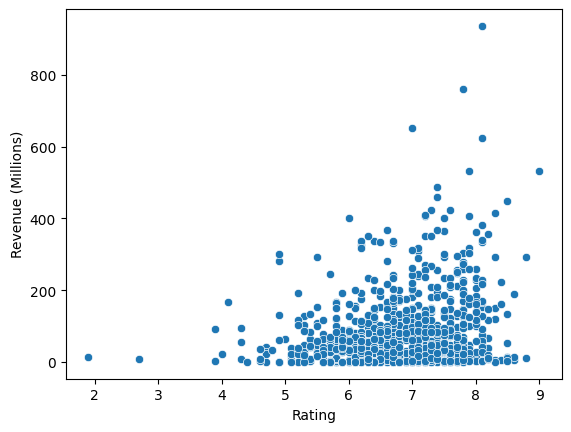

In [26]:
sns.scatterplot(x="Rating",y="Revenue (Millions)",data=data)

# 11.Classify Movies Based on Rating [Excellent,Good,and Average]

In [ ]:
data.columns

In [ ]:
def rating(rating):
    if rating >= 8.0:
        return "Excellent"
    elif rating >= 7.0:
        return "Good"
    else:
        return "Average"

In [ ]:
data['rating_cat']=data['Rating'].apply(rating)

In [27]:
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


# 12.Count Number of Action Movies

In [ ]:
data.columns

In [ ]:
data['Genre'].dtype

In [ ]:
(data[data['Genre'].str.contains('Action',case=False)])

In [28]:
len(data[data['Genre'].str.contains('Action',case=False)])

303

# 13.Find Unique Values From Genre

In [ ]:
data.columns

In [ ]:
data['Genre']

In [30]:
list1=[]
for value in data['Genre']:
  list1.append(value.split(','))

In [ ]:
list1

In [31]:
one_d = []
for item in list1:
    for item1 in item:
        one_d.append(item1)

In [ ]:
one_d

In [32]:
uni_list=[]
for item in one_d:
  if item not in uni_list:
    uni_list.append(item)

In [33]:
uni_list

['Action',
 'Adventure',
 'Sci-Fi',
 'Mystery',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Fantasy',
 'Drama',
 'Music',
 'Biography',
 'Romance',
 'History',
 'Crime',
 'Western',
 'War',
 'Musical',
 'Sport']

## **Summary**
This Summary is based on the IMDB Movie Dataset in the last 10 years(From 2006-2016).
# Titles of The Movies Having Runtime Greater Than or equal to 180 Minutes are:-
* The Wolf of Wall Street
* The Hateful Eight
* La vie d'Adèle
* Grindhouse
*  Inland Empire

# The Years There Was The Highest Average Voting listed Here:-
  
In Year 2012 Average Voting is 285226.093750

In Year 2008 Average Voting is 275505.384615

In Year 2006 Average Voting is 269289.954545

In Year 2009 Average Voting is 255780.647059

In Year 2010 Average Voting is 252782.316667

In Year 2007 Average Voting is 244331.037736

In Year 2011 Average Voting is 240790.301587

In Year 2013 Average Voting is 219049.648352

In Year 2014 Average Voting is 203930.224490

In Year 2015 Average Voting is 115726.220472

In Year 2016 Average Voting is 48591.754209

## The Years There Was The Highest Average Revenue are listed Here:-

In Year 2009 Average Revenue is 112.601277

In Year 2012 Average Revenue is 107.973281

In Year 2010 Average Revenue is 105.081579

In Year 2008 Average Revenue is 99.082745

In Year 2007 Average Revenue is 87.882245

In Year 2011 Average Revenue is 87.612258

In Year 2013 Average Revenue is 87.121818

In Year 2006 Average Revenue is 86.296667

In Year 2014 Average Revenue is 85.078723

In Year 2015 Average Revenue is 78.355044

In Year 2016 Average Revenue is 54.690976

# The Top 5 And Last 5 Average Rating For Each Director is listed here:-

# Top 5

Nitesh Tiwari        8.80

Christopher Nolan    8.68

Olivier Nakache      8.60

Makoto Shinkai       8.60

Aamir Khan           8.50

# Last 5

Micheal Bafaro       3.50

Jonathan Holbrook    3.20

Shawn Burkett        2.70

James Wong           2.70

Jason Friedberg      1.90

# Top 10 Lengthy Movies Title and Runtime:-                        
Grindhouse:-
 Total Runtime 191 Minutes.

The Hateful Eight:-
 Total Runtime 187 Minutes.

The Wolf of Wall Street:-
 Total Runtime 180 Minutes.

La vie d'Adèle:-
 Total Runtime 180 Minutes.

Inland Empire:-
 Total Runtime 180 Minutes.

Cloud Atlas:-
 Total Runtime 172 Minutes.

3 Idiots:-
 Total Runtime 170 Minutes.

Interstellar:-
Total Runtime 169 Minutes.

Pirates of the Caribbean:At World's End:-
 Total Runtime 169 Minutes.

The Hobbit: An Unexpected Journey:-
Total Runtime 169 Minutes.

# The Total Number of Movies Per Year

In 2016 -------- 297 Movies.

In 2015 -------- 127 Movies.

In 2014 -------- 98 Movies.

In 2013 -------- 91 Movies.

In 2012 -------- 64 Movies.

In 2011 -------- 63 Movies.

In 2010 -------- 60 Movies.

In 2007 -------- 53 Movies.

In 2008 -------- 52 Movies.

In 2009 -------- 51 Movies.

In 2006 -------- 44 Movies.

# The Most Popular Movie Title is:-

Star Wars: Episode VII - The Force Awakens

# Top 10 Highest Rated Movie Titles And its Directors

1st:-The Dark Knight  
Rating:- 9.0  
Director:-Christopher Nolan

2nd:-Inception  
Rating:- 8.8  
Director:-Christopher Nolan

3rd:-Dangal  
Rating:- 8.8  
Director:-Nitesh Tiwari

4th:-Interstellar  
Rating:- 8.6  
Director:-Christopher Nolan

5th:-Kimi no na wa  
Rating:- 8.6  
Director:-Makoto Shinkai

6th:-The Intouchables  
Rating:- 8.6  
Director:-Olivier Nakache

7th:-The Prestige  
Rating:- 8.5  
Director:-Christopher Nolan

8th:-The Departed  
Rating:-8.5  
Director:-Martin Scorsese

9th:-The Dark Knight Rises
Rating:- 8.5  
Director:-Christopher Nolan

10th:-Whiplash  
Rating:- 8.5  
Director:-Damien Chazelle

# Top 10 Highest Revenue Movie Titles

1st:-Star Wars: Episode VII - The Force Awakens  
Revenue:- 936.63

2nd:-Avatar  
Revenue:- 760.51

3rd:-Jurassic World  
Revenue:- 652.18

4th:-The Avengers  
Revenue:- 623.28

5th:-The Dark Knight  
Revenue:- 533.32

6th:-Rogue One  
Revenue:- 532.17

7th:-Finding Dory  
Revenue:- 486.29

8th:-Avengers: Age of Ultron  
Revenue:- 458.99

9th:-The Dark Knight Rises  
Revenue:- 448.13

10th:-The Hunger Games: Catching Fire  
Revenue:- 424.65

# Does Rating Affect The Revenue?
Yes,Rating does affect Revenue, rating is high revenue also high.
The correlation between the rating of a product or service and its corresponding revenue is evident, as a higher rating tends to coincide with increased revenue.

# Classify Movies Based on Ratings Based on

[if rating >=8.0:Excellent,

if rating >= 7.0:Good,

else: Average]

Guardians of the Galaxy ----- Excellent

Prometheus ------------------ Good

Split ----------------------- Good

Sing ------------------------ Good

Suicide Squad --------------- Average  

# Total Number of Action Movies in IMDB Movie Dataset

Total of 303 Action Movies.

# All Unique Values From Genre From IMDB Movie Dataset

['Action',
 'Adventure',
 'Sci-Fi',
 'Mystery',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Fantasy',
 'Drama',
 'Music',
 'Biography',
 'Romance',
 'History',
 'Crime',
 'Western',
 'War',
 'Musical',
 'Sport']



      
            
     

